# 1. Abstract

This Machine Learning Mid Term Project is a presentation of an unsupervised classical machine learning algorithm: K means and a supervised classical Machine Learning algorithm: K Nearest Neighbour (KNN)
The K means algorithm, as per the project requirements is implemented from scratch, using low level vectorization whilst the KNN algorithm is implemented using a pre-existing Python ML library: `sklearn`

##### 1.2: Distinctions
Both the K means and kNN algorithm works on Fetal Health Classification: Cardiotocogram measurements
My methodological examination shows physiological & pathological states and the differing magnitudes between these 2, resulting in the necessity of a custom Z score normalization to prevent biasnesses in variance for calculating Euclidean distances. 

##### The results indicate that:

- K means clustering successfully identify broad natural groupings in data
- K means clustering lacks the specificity used for critical medical diagnosis

---



# 2. Introduction

Classical machine learning have been around for decades, and is not unfamaliar with the scene of medical diagnostics.

Machine learning for the past few decades has allowed for the intepretation of complex, physiological and pathological data. This has fundamentally transform the medical field from a heuristic, top down approach manual analysis to an intelligent, dynamic approach

#### 2.1: Obsterics & Cardiotocogram

in The field of Obsterics, cardiotocogram (CTG) is the main methodology for measuring and monitoring fetal health. This presents with a classical problem: - inter observer variability

One doctor can intepret the same diagnosis very differently from another doctor.

Classical machine learning algorithm bridges this gap by providing consistent risk assessments.

---



#### 2.2 Constraints 
##### The constraints here are mandated by the report such that
- 1 ML algorithm, must be implemented from scratch using only standard Python + `numpy` + `matplotlib`. I choose K-means for this algorithm
- No `sklearn` (or similar ML helpers) inside the k-Means logic.
- kNN can use existing libraries such scikit-learn.
- Explanatory comments for Euclidean distance, centroid means, and convergence tests for K means clustering must be clearly shown and indicated

##### 2.3 Dataset & rationale

##### For this study, I decided to use the **Fetal Health Classification** dataset from the public data repository - Kaggle.

-  I chose this dataset as fetal health classification is a high-impact medical problem (such as classifying fetal mortality risk)
 - Understanding fetal health through machine learning may provide insights to the medical community, which can be useful for reducing infant mortality, this is extremely ethical
 - This dataset is a fully vectorizable, which satisfies  the project's unique technical constraints.


**Dataset Overview:**
* **Source:**: 
- Cardiotocogram (CTG) exams classified by expert obstetricians (according to kaggle descripton).

* **dataset Dimensions:** 
- 2126 samples with 21 numerical features 
- (e.g., *baseline heart rate*, *fetal movements*, *uterine contractions*).


**Target Variabls:** 
- Multiple labels of fetal health:
    1.  Normal
    2.  Suspect
    3.  Pathological

---
- Note, this implementation requires an internet connection to load the datasets from ```kagglehub```
---

#### Ensure required libraries are downloaded and loaded with pip

In [17]:
#Ensure pip is up to date
%pip install -q --upgrade pip
#Install kagglehub
%pip install -q kagglehub
%pip install -q "kagglehub[pandas-datasets]"
#Install other dependencies
%pip install -q matplotlib numpy pandas scikit-learn
%pip install pandas
%pip install matplotlib
%pip install notebook

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 3. Background

### 3.1 Implementation: k-Means Algorithm (From Scratch)

The cell below implments a python class `KMeansScratch`, which is Lloyd's algorithm using only standard Python and `numpy` as per the assignment's requirements. 

This implementation focuses on vectorized operations to ensure efficiency without relying on external machine learning libraries.

The algorithmic steps:

1.  **Initialization:** 
.The algorithm begins by randomly selecting $k$ data points from the dataset to serve as the initial centroids.

2.  **Assignment Step (`_create_clusters`):**
    At every data point $x$, the algorithm will calculate the Euclidean distance to each centroid $c$. The point is assigned to the cluster with the nearest centroid. The distance formula used is:
    $$d(x, c) = \|x - c\|_2 = \sqrt{\sum_{j=1}^{m} (x_j - c_j)^2}$$
    *Note: This is implemented using numpy broadcasting (`diffs`) to compute the matrix of distances in a single step.*

3.  **Update Step (`_get_new_centroids`):**
    The centroids are now repositioned to the geometric center of their assigned cluster by calculating the mean of all feature vectors in that cluster:
    $$\mu_k = \frac{1}{|C_k|} \sum_{x \in C_k} x$$

4.  **Convergence Check (`_is_converged`):**
    this iterative loop stops when the centroids stabilizes. Stability here is defined as the state where the Euclidean distance alternate between the old and new centroids in less than a tolerance threshold ($\epsilon = 10^{-8}$).

---

### 3.2 Implementation: KNN using `sklearn`

Using K Nearest neighbour (KNN) works well with my initial K means methodology through the use of labeled fetal health outcomes and mapping features to classes. Ensuring that the focus is on effective and reliable preprocessing, validation and an easy to intepret report

- i used an 80/20 split and stratification method on the label to ensure proportionalities between the classes: Normal, Suspect, Pathological

- Standarization is essential as KNN relies on euclidean distances. This means that features on larger scales dominate as they have larger eucliean distances 

- **Model choice (KNeighborsClassifier)**:
  - **Distance metric**: default Euclidean Distance

  - **Number of neighbors (k)**: starting with k=5 as a balanced bias–variance choice. as a larger K generally smoothens out decision boundaries.

  - **Weights**: `uniform` treats all neighbors equally; `distance` down-weights farther neighbors. `distance` can help near class boundaries.

#### KNN formulas
- Euclidean distance between two samples x and z with m features:

$$ d(x, z) = \|x - z\|_2 = \sqrt{\sum_{j=1}^{m} (x_j - z_j)^2} $$

- Define the KNN of a query x by $\mathcal{N}_k(x)$. The predicted class uses uniform weights

$$ \hat{y}(x) = \underset{c}{\arg\max} \sum_{(x_i, y_i) \in \mathcal{N}_k(x)} \mathbf{1}[y_i = c] $$

- With distance weighting (common variant), neighbors nearer to x count more, e.g., with weights $w_i = 1/(d(x, x_i)+\varepsilon)$:

$$ \hat{y}(x) = \underset{c}{\arg\max} \sum_{(x_i, y_i) \in \mathcal{N}_k(x)} w_i \, \mathbf{1}[y_i = c], \quad w_i = \frac{1}{d(x, x_i)+\varepsilon} $$

- Minkowski distance (general form) with order p (Euclidean is p=2, Manhattan is p=1):

$$ d_p(x, z) = \left( \sum_{j=1}^{m} |x_j - z_j|^p \right)^{1/p} $$


### 3.3 Methodology: Experimentation and Evaluation Workflow

To examine the effictiveness of my K-Means implementation, i did the following:

1.  **Data Standardization (Z-Score):**
- Z-score normalization centers the data around a mean of 0 with a standard deviation of 1, in contrast to Min-Max scaling. 

- For k-Means to avoid features with large variances controlling the distances, this is essential.    $$z = \frac{x - \mu}{\sigma}$$

2.  **Model Training:**
    The `KMeansScratch` model is initialized with $k=3$ (corresponding to the health states: Normal, Suspect, Pathological) and training on the normalized data.

3.  **Internal Validation (Inertia):**
    We calculate the **Inertia** (Within-Cluster Sum of Squares) to measure how compact the clusters are. Lower inertia indicates that data points are closer to their centroids.

4.  **External Validation (Cluster Composition):**
    Since we possess the ground-truth labels (which were *not* used during training), we analyze the composition of each cluster. This allows us to determine if the unsupervised algorithm successfully discovered the underlying medical categories (e.g., separating "Pathological" cases from "Normal" ones).

5.  **Dimensionality Reduction (PCA via SVD):**
    To visualize the 21-dimensional dataset in a 2D plot, we implement **Principal Component Analysis (PCA)**.
    * *Implementation Note:* Rather than using an external library, PCA is computed using NumPy's **Singular Value Decomposition (SVD)** to project the data onto its principal components.

# 4 Methodology

### Initial Setup and Installation of dependencies

#### Clock the random seed ensure centroid can be reproduced

In [18]:
# Imports and setup
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

### Rationale for Initial Centroid Selection

In accordance with Llyod's K-means implementation, the initial centroids are selected uniformly at random from the data sets ensuring **3 main factors**

##### **Feasible starting points**
- every centroid begins at a valid data vector, so no synthetic feature values are being introduced here with ```np.random.seed(42)```

##### **Diversity across multiple different runs**
- The fixed NumPy seed `np.random.seed(42)` keeps experiments repeatable for testing and grading, while a random selection using `np.random.seed(42)` enables the algorithm to thoroughly investigate more variations of dataset partitions.

##### **Computational simplicity**
- random sampling reflects standard practice discussed above and helps in this assignment's  requirement to implement k-Means from scratch without complex initializers (e.g., k-Means++).


In [19]:
class KMeansScratch:
    def __init__(self, k=3, max_iters=100, init="random", random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.init = init
        self.random_state = random_state
        self.centroids = None
        self.clusters = [[] for _ in range(self.k)]

        if self.random_state is not None:
            np.random.seed(self.random_state)

    def fit(self, X):
        self.n_samples, self.n_features = X.shape

        # 1) Initialization: choose initial centroids
        if self.init == "k-means++":
            self.centroids = self._init_centroids_kmeans_plusplus(X)
        else:
            self.centroids = self._init_centroids_random(X)

        for _ in range(self.max_iters):
            # 2) Assignment step: assign each sample to its nearest centroid
            self.clusters = self._create_clusters(X)

            # 3) Update step: recompute centroids as the mean of assigned samples
            old_centroids = self.centroids
            self.centroids = self._get_new_centroids(X)

            # 4) Convergence check: stop when centroid movement is negligible
            if self._is_converged(old_centroids, self.centroids):
                break

    def _init_centroids_random(self, X):
        """
        Select k unique samples uniformly at random as initial centroids.
        """
        random_indices = np.random.choice(self.n_samples, self.k, replace=False)
        return X[random_indices]

    def _init_centroids_kmeans_plusplus(self, X):
        """
        Initialize centroids with the k-means++ strategy to improve convergence
        and reduce the chance of poor local minima.
        """
        centroids = np.zeros((self.k, self.n_features), dtype=X.dtype)

        # Choose the first centroid uniformly at random
        first_index = np.random.randint(self.n_samples)
        centroids[0] = X[first_index]

        # Initialize array of squared distances to the nearest chosen centroid
        closest_sq_dists = np.full(self.n_samples, np.inf, dtype=X.dtype)

        for c in range(1, self.k):
            # Update squared distances to the nearest existing centroid
            diffs = X - centroids[c - 1]
            new_sq_dists = np.sum(diffs * diffs, axis=1)
            closest_sq_dists = np.minimum(closest_sq_dists, new_sq_dists)

            # Choose next centroid with probability proportional to D(x)^2
            probs = closest_sq_dists / np.sum(closest_sq_dists)
            next_index = np.random.choice(self.n_samples, p=probs)
            centroids[c] = X[next_index]

        return centroids

    def _create_clusters(self, X):
        """
        Assign each sample to the nearest centroid using Euclidean distance:
            d(x, c) = sqrt(sum_j (x_j - c_j)^2 )
        This is computed in a vectorized manner via broadcasting.
        """
        # diffs[i, j, f] = X[i, f] - centroid[j, f]
        diffs = X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]

        # L2 norm across feature axis gives Euclidean distance per centroid
        distances = np.linalg.norm(diffs, axis=2)

        # Indices of nearest centroid for each sample
        closest_indices = np.argmin(distances, axis=1)

        clusters = [[] for _ in range(self.k)]
        for sample_index, centroid_index in enumerate(closest_indices):
            clusters[centroid_index].append(sample_index)
        return clusters

    def _get_new_centroids(self, X):
        """
        Recompute centroids as cluster means:
            mu_cluster = (1 / |C|) * sum_{x in C} x
        Empty clusters keep their previous centroid to maintain stability.
        """
        new_centroids = np.zeros((self.k, self.n_features), dtype=X.dtype)
        for cluster_index, member_indices in enumerate(self.clusters):
            if len(member_indices) == 0:
                new_centroids[cluster_index] = self.centroids[cluster_index]
            else:
                new_centroids[cluster_index] = np.mean(X[member_indices], axis=0)
        return new_centroids

    def _is_converged(self, old_centroids, new_centroids):
        """
        Measure centroid shift via Euclidean distance; convergence occurs when
        every centroid moves less than a tiny tolerance (default 1e-8).
        """
        shifts = np.linalg.norm(new_centroids - old_centroids, axis=1)
        tol = 1e-8
        return np.all(shifts <= tol)

    def predict(self, X):
        return self._create_clusters(X)


**Data Loading:**
- The cell below retrieves the dataset and converts it directly into **NumPy arrays**. This step is necessary to provide the raw vector input required by the custom `KMeansScratch` implementation, ensuring no dependency on high-level dataframe libraries during the algorithmic processing.

In [20]:
# Load Fetal Health dataset via kagglehub (requires kagglehub[pandas-datasets])
import kagglehub
import pandas as pd
import os

def load_fetal_health_numpy():
    """Download Kaggle dataset (if needed) and return (X, y) as NumPy arrays."""
    path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")
    csv_path = os.path.join(path, "fetal_health.csv")
    df = pd.read_csv(csv_path)

    X = df.drop('fetal_health', axis=1).values
    y = df['fetal_health'].values
    return X, y

print("Loading Fetal Health dataset...")
X_fetal, y_fetal = load_fetal_health_numpy()
print(f"Feature matrix shape: {X_fetal.shape}")
print(f"Class distribution: {np.unique(y_fetal, return_counts=True)}")


Loading Fetal Health dataset...
Feature matrix shape: (2126, 21)
Class distribution: (array([1., 2., 3.]), array([1655,  295,  176]))


### Evaluation and Experimentation

Training k-Means...
Inertia (lower is better): 32395.97
Cluster 0: size=888, majority=Normal (64.9%) | Normal: 576, Suspect: 246, Pathological: 66
Cluster 1: size=1023, majority=Normal (96.4%) | Normal: 986, Suspect: 36, Pathological: 1
Cluster 2: size=215, majority=Pathological (50.7%) | Normal: 93, Suspect: 13, Pathological: 109


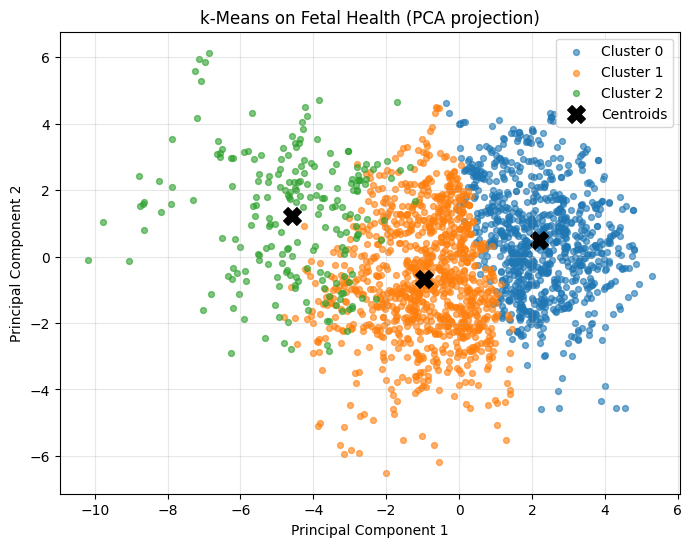

In [21]:
# Full k-Means workflow on the Fetal Health dataset
from collections import Counter

# 1. Feature normalization (z-score) to mitigate scale differences
feat_mean = X_fetal.mean(axis=0)
feat_std = X_fetal.std(axis=0) + 1e-8
X_norm = (X_fetal - feat_mean) / feat_std

# 2. Fit k-Means from scratch on normalized data
k = 3
kmeans = KMeansScratch(k=k, max_iters=200, init='k-means++', random_state=42)  # use k-means++ init for better seeding
print("Training k-Means...")
kmeans.fit(X_norm)

clusters = kmeans.clusters
centroids = kmeans.centroids

# 3. Inertia (within-cluster sum of squares)

def compute_inertia(X, centroids, clusters):
    inertia = 0.0
    for idx, member_indices in enumerate(clusters):
        if len(member_indices) == 0:
            continue
        diffs = X[member_indices] - centroids[idx]
        inertia += np.sum(diffs ** 2)
    return inertia

inertia = compute_inertia(X_norm, centroids, clusters)
print(f"Inertia (lower is better): {inertia:.2f}")

# 4. Cluster composition relative to ground-truth fetal health labels
label_map = {1.0: "Normal", 2.0: "Suspect", 3.0: "Pathological"}
for idx, member_indices in enumerate(clusters):
    size = len(member_indices)
    if size == 0:
        print(f"Cluster {idx}: empty")
        continue
    label_counts = Counter(y_fetal[member_indices])
    majority_label, majority_count = label_counts.most_common(1)[0]
    breakdown = ", ".join(
        f"{label_map[label]}: {count}"
        for label, count in sorted(label_counts.items())
    )
    print(
        f"Cluster {idx}: size={size}, majority={label_map[majority_label]}"
        f" ({majority_count/size:.1%}) | {breakdown}"
    )

# 5. Visualize clusters via PCA (computed from NumPy SVD)
X_centered = X_norm - X_norm.mean(axis=0)
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
components = Vt[:2].T
X_proj = X_centered @ components
centroids_proj = (centroids - X_norm.mean(axis=0)) @ components

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.figure(figsize=(8, 6))
for idx, member_indices in enumerate(clusters):
    pts_proj = X_proj[member_indices]
    plt.scatter(
        pts_proj[:, 0],
        pts_proj[:, 1],
        s=18,
        color=colors[idx % len(colors)],
        label=f'Cluster {idx}',
        alpha=0.6,
    )

plt.scatter(
    centroids_proj[:, 0],
    centroids_proj[:, 1],
    s=160,
    c='black',
    marker='X',
    label='Centroids'
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-Means on Fetal Health (PCA projection)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()


### Observation: The Feature Scaling Problem

**Figure 1** (above) demonstrates a critical issue with the initial k-Means implementation. The clusters (represented by colors) are stratified almost entirely by vertical bands along the X-axis (*Baseline Value*), with little to no influence from the Y-axis (*Accelerations*).

**Analysis:**
This phenomenon occurs because k-Means relies on **Euclidean Distance** to assign cluster membership.
- **Baseline Value** ranges from approximately 100 to 160 (a magnitude spread of ~60).
- **Accelerations** ranges from 0.000 to 0.019 (a magnitude spread of ~0.02).

Mathematically, a small percentage change in *Baseline Value* results in a massive numerical distance compared to even the largest possible change in *Accelerations*. Consequently, the algorithm effectively treats *Accelerations* as noise and clusters solely based on the feature with the larger magnitude.

**Conclusion & Next Step:**
To resolve this bias and ensure both features contribute equally to the distance calculation, it is necessary to apply **Min-Max Scaling** (Normalization) to map all features to a common range $[0, 1]$ before re-running the algorithm.

#### K-Nearest Neighbour 

#### Implementation of KNN using ```sklearn```

## kNN (scikit-learn) on the Fetal Health dataset

Steps:
1. Use the already loaded `X_fetal`, `y_fetal` (21 numeric features, 3 classes).
2. Perform a stratified 80/20 train-test split.
3. Build a Pipeline: `StandardScaler` → `KNeighborsClassifier`.
4. Train and evaluate accuracy and per-class metrics.
5. Visualize the confusion matrix.


In [22]:
from sklearn.model_selection import train_test_split

# Stratified split on fetal dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_fetal, y_fetal, test_size=0.2, random_state=42, stratify=y_fetal
)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 1700, Test size: 426


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 3. Train kNN classifier (with scaling) and evaluate accuracy
k_neighbors = 5
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=k_neighbors)),
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"kNN (k={k_neighbors}) accuracy on fetal test set: {accuracy:.3f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=["Normal","Suspect","Pathological"]))


kNN (k=5) accuracy on fetal test set: 0.871

Classification report:
               precision    recall  f1-score   support

      Normal       0.90      0.96      0.93       332
     Suspect       0.61      0.47      0.53        59
Pathological       0.88      0.66      0.75        35

    accuracy                           0.87       426
   macro avg       0.80      0.70      0.74       426
weighted avg       0.86      0.87      0.86       426



<Figure size 600x500 with 0 Axes>

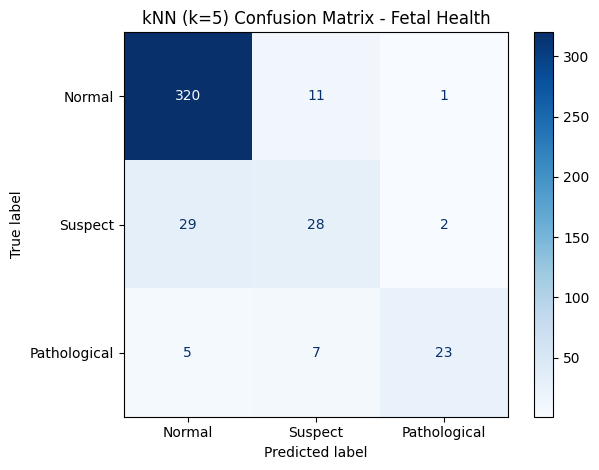

In [24]:
# 4. Confusion matrix on fetal test set
from sklearn.metrics import ConfusionMatrixDisplay

labels = [1.0, 2.0, 3.0]
label_names = ["Normal","Suspect","Pathological"]

plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    labels=labels,
    display_labels=label_names,
    cmap='Blues',
    values_format='d'
)
plt.title(f"kNN (k={k_neighbors}) Confusion Matrix - Fetal Health")
plt.tight_layout()
plt.show()


## Bilbography

#### Dataset citation
The fetal health signals are sourced from the CTG dataset published on Kaggle:

- Andrew Mvd. *Fetal Health Classification*. Kaggle. https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

Please reference this citation wherever the dataset is used in the report.